In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 27

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 27)             │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,367 (5.34 KB)

 Trainable params: 1,367 (5.34 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
118/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0716 - loss: 3.2291
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0722 - loss: 3.2266 - val_accuracy: 0.1583 - val_loss: 2.9428
Epoch 2/1000
104/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1671 - loss: 2.8978
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1735 - loss: 2.8791 - val_accuracy: 0.3782 - val_loss: 2.3042
Epoch 3/1000
108/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2903 - loss: 2.4110
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2918 - loss: 2.4014 - val_accuracy: 0.4324 - val_loss: 1.8609
Epoch 4/1000
102/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3255 - loss: 2.1160
Epoch 4: saving model to model/keypoint_classifier/keypoint_classi

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8350 - loss: 0.6709


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[6.4941752e-04 6.9194608e-03 3.0100372e-04 3.3526383e-03 1.0219086e-04
 3.9685913e-04 5.0755735e-03 4.7232760e-03 7.1350043e-03 1.0326413e-09
 1.7796843e-01 4.1705053e-02 1.1599262e-03 8.8237511e-04 2.5248408e-04
 3.7677442e-03 1.0107168e-03 5.9148641e-03 2.0282152e-03 5.7502189e-03
 3.2203648e-02 3.7126400e-02 1.1486922e-04 2.5411856e-01 1.5833993e-09
 3.9608461e-01 1.1256444e-02]
25


# Confusion matrix

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


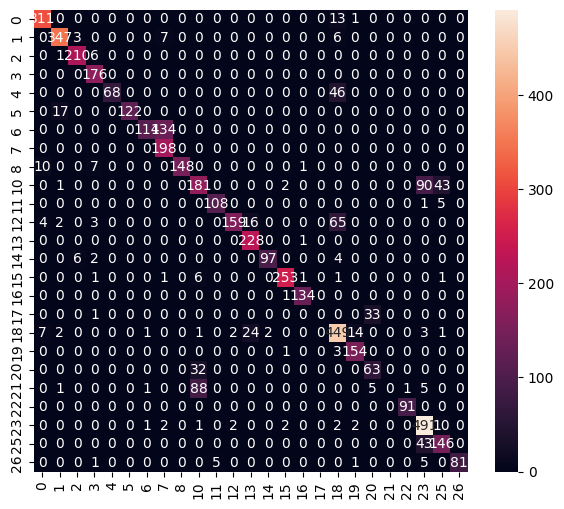

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       325
           1       0.94      0.96      0.95       363
           2       0.96      0.97      0.96       217
           3       0.89      1.00      0.94       176
           4       1.00      0.60      0.75       114
           5       1.00      0.88      0.93       139
           6       0.97      0.46      0.62       248
           7       0.58      1.00      0.73       198
           8       1.00      0.89      0.94       166
          10       0.59      0.57      0.58       317
          11       0.96      0.95      0.95       114
          12       0.98      0.64      0.77       249
          13       0.85      1.00      0.92       229
          14       0.98      0.89      0.93       109
          15       0.98      0.96      0.97       264
          16       0.98      0.99      0.99       135
          17       0.00      0.00      0.00        34
     

c:\Users\THANH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\THANH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\THANH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\THANH\AppData\Local\Temp\tmpv2j2lmz5\assets


INFO:tensorflow:Assets written to: C:\Users\THANH\AppData\Local\Temp\tmpv2j2lmz5\assets


Saved artifact at 'C:\Users\THANH\AppData\Local\Temp\tmpv2j2lmz5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  2662484162896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2662484164240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2662484160976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2662484158288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2662488092560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2662488092944: TensorSpec(shape=(), dtype=tf.resource, name=None)


7568

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.4941752e-04 6.9194608e-03 3.0100386e-04 3.3526383e-03 1.0219086e-04
 3.9685910e-04 5.0755735e-03 4.7232760e-03 7.1350005e-03 1.0326413e-09
 1.7796846e-01 4.1705035e-02 1.1599268e-03 8.8237511e-04 2.5248417e-04
 3.7677442e-03 1.0107167e-03 5.9148641e-03 2.0282150e-03 5.7502189e-03
 3.2203645e-02 3.7126403e-02 1.1486920e-04 2.5411862e-01 1.5833991e-09
 3.9608461e-01 1.1256446e-02]
25
